In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.express as px 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("/kaggle/input/uefa-euro-2024-players/euro2024_players.csv")

In [3]:
#dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         623 non-null    object
 1   Position     623 non-null    object
 2   Age          623 non-null    int64 
 3   Club         623 non-null    object
 4   Height       623 non-null    int64 
 5   Foot         620 non-null    object
 6   Caps         623 non-null    int64 
 7   Goals        623 non-null    int64 
 8   MarketValue  623 non-null    int64 
 9   Country      623 non-null    object
dtypes: int64(5), object(5)
memory usage: 48.8+ KB


In [4]:
#dataframe column description

df.describe()

,Age,Height,Caps,Goals,MarketValue
count,623.000000,623.000000,623.000000,623.000000,6.230000e+02
mean,27.040128,184.181380,30.338684,4.152488,1.840903e+07
std,4.124275,6.569258,30.987902,10.086803,2.426195e+07
min,16.000000,167.000000,0.000000,0.000000,5.000000e+04
25%,24.000000,180.000000,7.000000,0.000000,2.900000e+06
50%,27.000000,185.000000,21.000000,1.000000,9.000000e+06
75%,30.000000,189.000000,42.000000,4.000000,2.500000e+07
max,41.000000,202.000000,206.000000,128.000000,1.800000e+08


In [5]:
#first 10 rows of the dataframe 

df.head(10)

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
0,Marc-André ter Stegen,Goalkeeper,32,FC Barcelona,187,right,40,0,28000000,Germany
1,Manuel Neuer,Goalkeeper,38,Bayern Munich,193,right,119,0,4000000,Germany
2,Oliver Baumann,Goalkeeper,34,TSG 1899 Hoffenheim,187,right,0,0,3000000,Germany
3,Nico Schlotterbeck,Centre-Back,24,Borussia Dortmund,191,left,12,0,40000000,Germany
4,Jonathan Tah,Centre-Back,28,Bayer 04 Leverkusen,195,right,25,0,30000000,Germany
5,Antonio Rüdiger,Centre-Back,31,Real Madrid,190,right,69,3,25000000,Germany
6,Waldemar Anton,Centre-Back,27,VfB Stuttgart,189,right,2,0,20000000,Germany
7,Robin Koch,Centre-Back,27,Eintracht Frankfurt,191,right,9,0,18000000,Germany
8,David Raum,Left-Back,26,RB Leipzig,180,left,21,0,20000000,Germany
9,Maximilian Mittelstädt,Left-Back,27,VfB Stuttgart,180,left,4,1,17000000,Germany


In [6]:
#dataframe column and row numbers
df.shape

(623, 10)

In [7]:
#checking for the null valus in the column

df.isna().sum()

Name           0
Position       0
Age            0
Club           0
Height         0
Foot           3
Caps           0
Goals          0
MarketValue    0
Country        0
dtype: int64

In [8]:
df.replace("-","Unknown",inplace = True)

In [9]:
#foot count of players 

foot = df.Foot
foots = foot.value_counts()
foots

Foot
right      436
left       150
both        31
Unknown      3
Name: count, dtype: int64

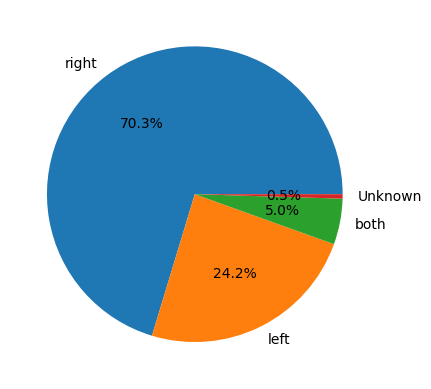

In [10]:
#visulization for player's foot count

label = foots.index 
plt.pie(foots,labels=label,autopct='%1.1f%%');

In [11]:
#Top 5 Club with highest number of players 

club_df = df.groupby('Club') ['Name'].count().reset_index()
sorted_club_df = club_df.sort_values(by='Name',ascending=False).head(5)
sorted_club_df

,Club,Name
104,Inter Milan,13
124,Manchester City,13
64,FC Barcelona,12
166,Real Madrid,12
148,Paris Saint-Germain,12


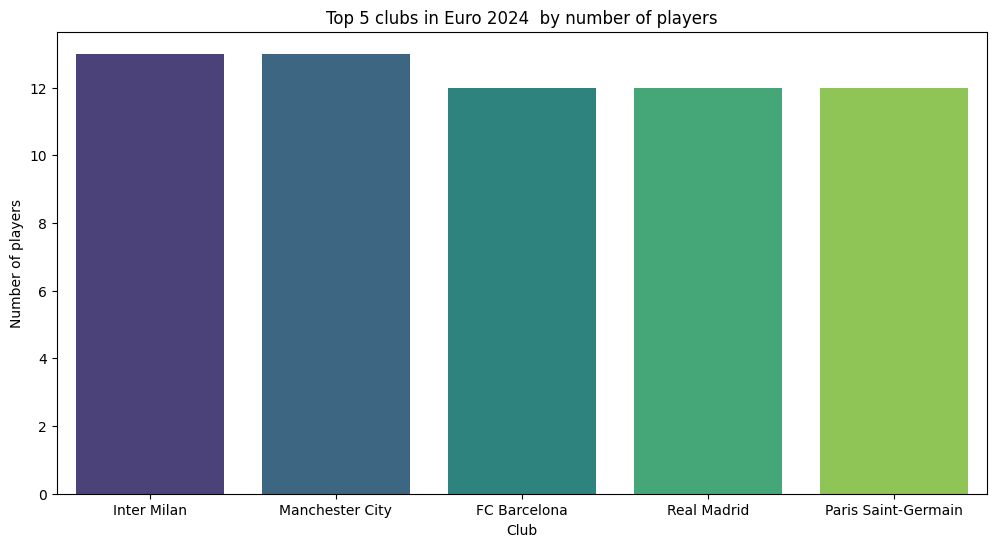

In [12]:
#create the bar plot for Top 5 Club with highest number of players 

plt.figure(figsize=(12,6))
sns.barplot(data=sorted_club_df, x='Club', y='Name', palette='viridis')

#customize the plot 

plt.title('Top 5 clubs in Euro 2024  by number of players')
plt.ylabel('Number of players');



In [13]:
#most valuable players
most_valuable_players = df.loc[df['MarketValue'] == df["MarketValue"].max()]
most_valuable_players

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
250,Jude Bellingham,Attacking Midfield,20,Real Madrid,186,right,29,3,180000000,England
411,Kylian Mbappé,Centre-Forward,25,Paris Saint-Germain,178,right,78,47,180000000,France


In [14]:
#least valuable players

least_valuable_players = df.loc[df['MarketValue']==df['MarketValue'].min()]
least_valuable_players

,Name,Position,Age,Club,Height,Foot,Caps,Goals,MarketValue,Country
547,Giorgi Loria,Goalkeeper,38,Dinamo Tbilisi,197,right,77,0,50000,Georgia


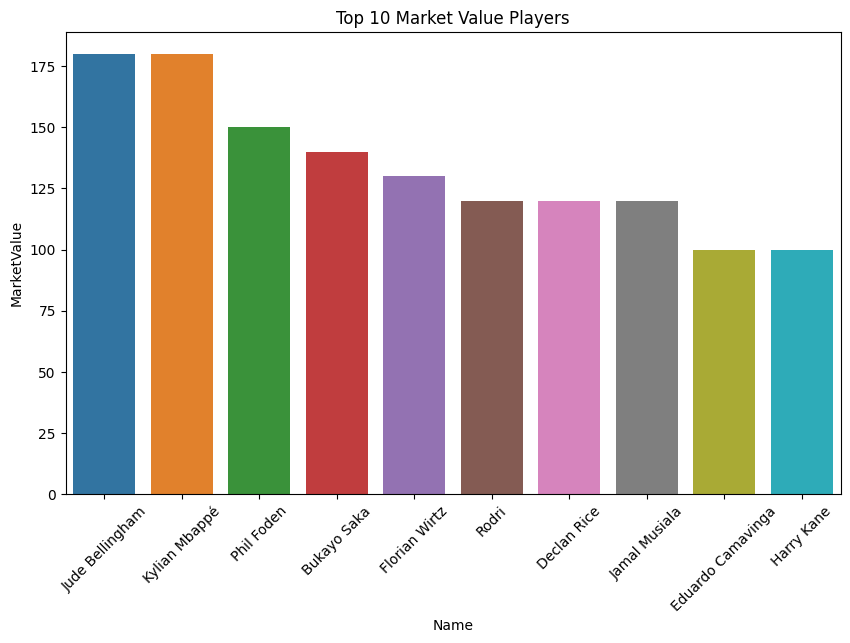

In [15]:
#Top 10 Valuable players graphs 

player_values = df.sort_values(by='MarketValue',ascending=False).head(10)
player_names = player_values["Name"]
market_value = player_values["MarketValue"]/(10**6) #to make it millions

plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
plt.title("Top 10 Market Value Players")
sns.barplot(x=player_names,y=market_value);


In [16]:
#avergae age per country 

avg_age = df.groupby('Country').agg({'Age':'mean'}).reset_index()
avg_age.rename(columns={'Age':'Average Age'},inplace = True)
avg_age.sort_values(by='Average Age',inplace=True)

In [17]:
country_age_avg = px.line(avg_age, y ='Average Age', x ='Country')
country_age_avg.show()

In [18]:
# Create the sunburst chart with the cleaned DataFrame

df_cleaned = df.dropna(subset=['Country', 'Position', 'Foot'])
burst = px.sunburst(df_cleaned,path=['Country','Position','Foot'],title='Distribution of Players, Position and Foot Alignment Per Country',height=880)
burst.show()

In [19]:
# Position Stackbar chat by Country 

position_colors = {
    'Goalkeeper': '#aec6cf',  
    'Centre-Back': '#87bdd8',  
    'Left-Back': '#6baed6',  
    'Right-Back': '#4292c6', 
    'Defensive Midfield': '#2171b5',  
    'Central Midfield': '#08519c',  
    'Attacking Midfield': '#08306b',  
    'Left Winger': '#6baed6',  
    'Right Winger': '#2171b5',  
    'Second Striker': '#08519c',  
    'Centre-Forward': '#1f77b4',  
    'Right Midfield': '#6baed6',  
    'Left Midfield': '#2171b5'  
}

In [20]:
country_position = df.groupby(by=['Country','Position']).agg(Position_Count=('Position','count')).reset_index()
position_stacked = px.bar(country_position, y='Country', x = 'Position_Count', color ='Position',color_discrete_map=position_colors,
                         title='Players Distribution by Position per Country', height=800);

position_stacked.show()


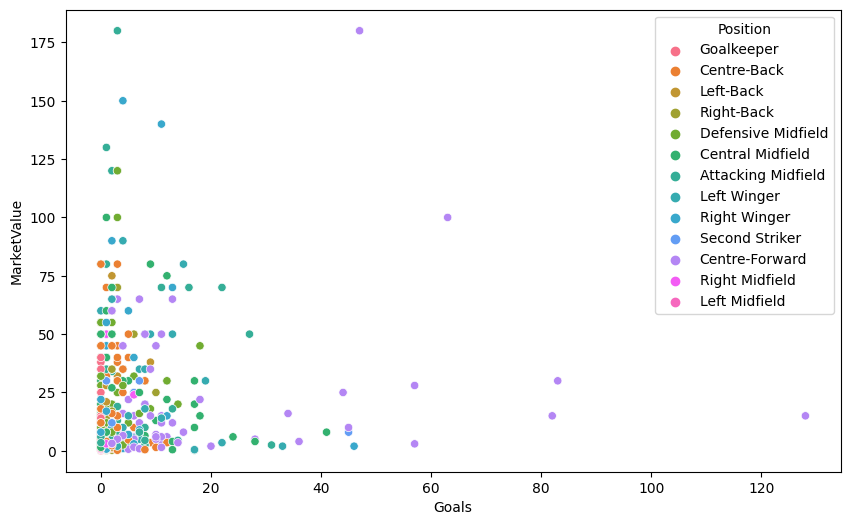

In [21]:
#scatter plot of goals vs Market Value using seaborn

player_market_value = df["MarketValue"]/(10**6) #to make it millions

plt.figure(figsize=(10,6))
sns.scatterplot(df,x='Goals', y = player_market_value, hue='Position')
plt.show()

In [22]:
#scatter plot of goals vs Market Value using plotply

fig = px.scatter(
    df, 
    x='Goals', 
    y='MarketValue', 
    color='Position', 
    title='Scatter Plot of Goals vs Market Value',
    labels={'Goals': 'Goals', 'MarketValueMillions': 'Market Value (Millions)'},
    height=600,
    width=800
)

# Show plot
fig.show()